In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/Users/ahmedezzat/Downloads/Data Analysis/train-1.csv",sep=",",encoding="utf-8")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning Data

In [363]:
#Check and Remove Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## 1- Change in-correct data types


In [364]:
# display names
Nunique = df.nunique()
dtypes = df.dtypes
pd.DataFrame ({"Dtypes":dtypes, "Num_unique":Nunique   } ).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtypes,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Num_unique,891,2,3,891,2,88,7,7,681,248,147,3


In [376]:
#convert data types
cols = ["Pclass", "SibSp", "Parch", "Sex", "Embarked", "Survived"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/291350959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].astype('category')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,int64,category,category,object,category,float64,category,category,object,float64,category


In [ ]:
#to replace value iside a column with diff value
#df['Survived'] = df['Survived'].replace({
#    '0': 'Yes_Survived',
#    '1': 'Not_Survived'
#})


## 2- Cleaning Nulls

In [366]:
#checking Nulls

df.isnull().sum() 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [367]:
Nnulls= df.isnull().sum()
ratio = Nnulls/df.shape[0]
pd.DataFrame({"number_Nulss":Nnulls, "Ratio":ratio}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
number_Nulss,0.0,0.0,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.0,0.771044,0.002245


In [368]:
#Remove the columns that most of their values are nulls
#Drop column 'Cabin' 

df.drop(columns=['Cabin'],inplace=True)

In [369]:
#Fill the Null cells of 'Age' since ratio of nulls is 19% only!
median= df['Age'].median()
df['Age'].fillna(median, inplace=True)


/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2832597767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)


In [206]:
pd.DataFrame(df.isnull().sum()).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,0,0,0,0,0,0,0,0,2


In [370]:
#Drop nulls of exact column 'Embarked'
df= df.dropna(subset=['Embarked'])


In [371]:
#Check that there are no more nulls
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3-Handeling Outliars


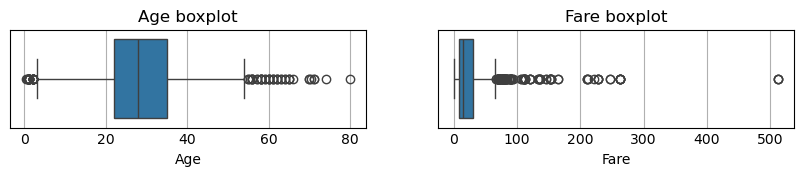

In [372]:
#Check outliars
num_cols = df.select_dtypes("float").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

In [373]:
# Clean outliars from the data
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3205967398.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3205967398.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(Lower_Outlie

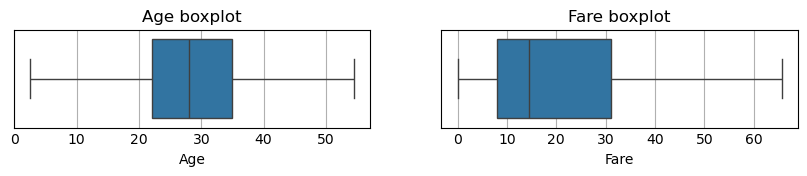

In [374]:
# Check that there are no outliars
num_cols = df.select_dtypes("float").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

## Q&A + Visualization


**1.What is the approximate percentage of passengers who survived the disaster?**

In [261]:
df['Survived'].value_counts(normalize=True) * 100

# the percentage of survived people is about 61%

Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2579704286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Survived'].value_counts().index,


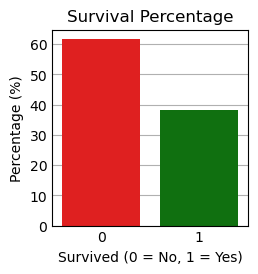

In [682]:
plt.subplots(figsize=(2, 2))

sns.barplot(x=df['Survived'].value_counts().index,
            y=d1,
            palette=['red', 'green'])

plt.title('Survival Percentage')
plt.ylabel('Percentage (%)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

**2.Did female passengers have a higher survival rate than male passengers? Support with numbers**


Text(0, 0.5, 'Number of Survivors')

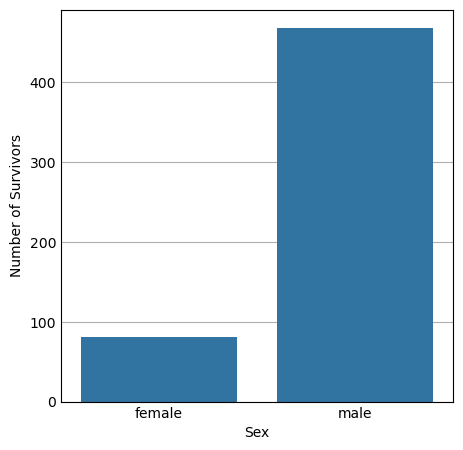

In [458]:
only_survived= df[df['Survived']==0]
plt.subplots(figsize=(4, 4))

sns.countplot(data=only_survived,x='Sex')
plt.ylabel('Number of Survivors') 

In [471]:
only_survived.groupby(['Sex'])[['Survived']].value_counts().reset_index

#the number of survived females are 81 which is lower than the males which is 468

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/1526443182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  only_survived.groupby(['Sex'])[['Survived']].value_counts().reset_index


<bound method Series.reset_index of Sex     Survived
female  0            81
        1             0
male    0           468
        1             0
Name: count, dtype: int64>

**4.Which passenger class (Pclass) had the highest survival rate? Which had the lowest?**

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2893671696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=only_survived,x='Pclass', palette=['green', 'orange', 'red'])


Text(0, 0.5, 'Number of Survivors')

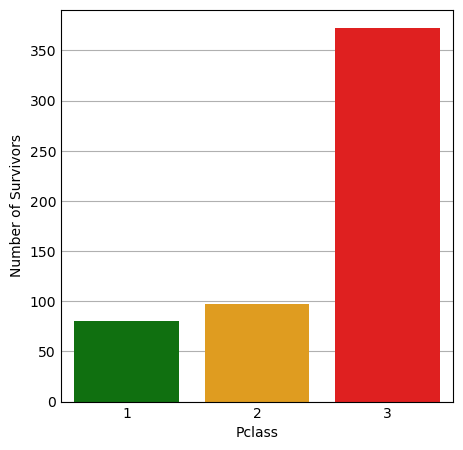

In [476]:
plt.subplots(figsize=(4, 4))

sns.countplot(data=only_survived,x='Pclass', palette=['green', 'orange', 'red'])
plt.ylabel('Number of Survivors') 

In [260]:
df.groupby(['Pclass'])[['Survived']].value_counts().reset_index

#class 3 has the highest survival rate
#class 1 has the lowest survival rate

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3116261318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass'])[['Survived']].value_counts().reset_index


<bound method Series.reset_index of Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64>

**5.Did children (under 18 years old) have a better chance of survival compared to adults?**

In [443]:
interval = pd.interval_range(start=0, freq =19, end=80)
df['Age_interval']=pd.cut(df['Age'], bins = interval,labels=[])
da = df.groupby(['Survived'])[['Age_interval']].value_counts().reset_index()
da.set_axis(['Survived','Age_interval','count'],axis='columns')
da

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3030521891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_interval']=pd.cut(df['Age'], bins = interval,labels=[])
/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3030521891.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  da = df.groupby(['Survived'])[['Age_interval']].value_counts().reset_index()


,Survived,Age_interval,count
0,0,"(19, 38]",353
1,0,"(38, 57]",111
2,0,"(0, 19]",85
3,0,"(57, 76]",0
4,1,"(19, 38]",196
5,1,"(0, 19]",79
6,1,"(38, 57]",65
7,1,"(57, 76]",0


<Axes: xlabel='Age_interval', ylabel='count'>

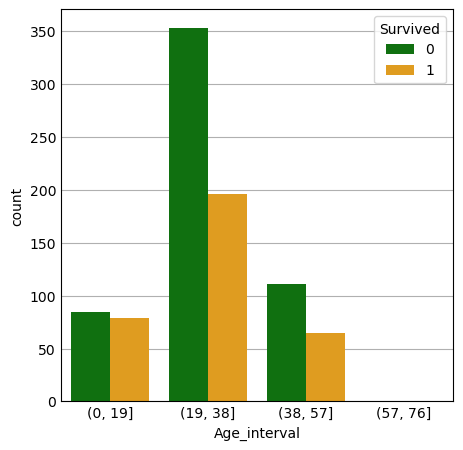

In [279]:
plt.subplots(figsize=(4, 4))

sns.barplot(data=da,x='Age_interval',y='count',hue='Survived', palette=['green', 'orange'])

#only about 85 children under 18 who are survided compared to the adults which were higher.

**6.Which embarkation port had the highest number of survivors? Are there noticeable differences between the three ports?**

In [335]:
survivors['Embarked'].value_counts()

#Port s shows very high number of survivals in comparison with the other ports - About 427 survival (78%)  comparing 2 second highest one which is Q that is only about 75 survivals

Embarked
S    427
C     75
Q     47
Name: count, dtype: int64

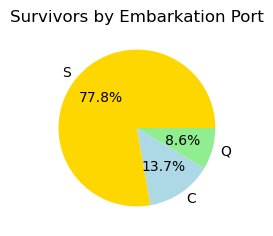

In [477]:
survivors_by_embarkation = only_survived['Embarked'].value_counts()
plt.figure(figsize=(2,2))
survivors_by_embarkation.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Survivors by Embarkation Port')
plt.ylabel('')  # Hide the y-label
plt.show()

**7.Did passengers traveling with family members (SibSp > 0 or Parch > 0) have a better chance of survival compared to those traveling alone?**

In [381]:
#I have to create another column to filter which passanger had a family members
df['With Family'] = np.where(
    (df['SibSp'].astype(str) != '0') | (df['Parch'].astype(str) != '0'),
    'With Family',
    'Alone')


/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/1004435832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['With Family'] = np.where(


<Axes: xlabel='With Family', ylabel='count'>

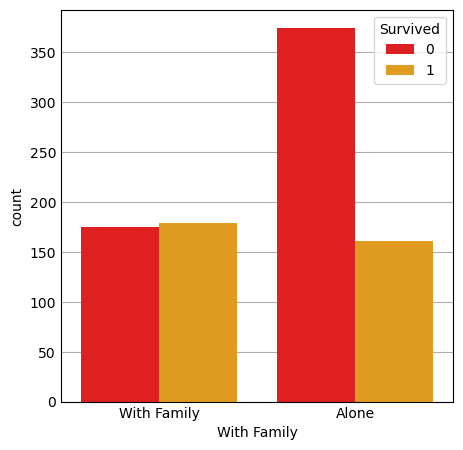

In [405]:
plt.subplots(figsize=(4, 4))

sns.countplot(data=df,x='With Family',hue='Survived', palette=['red', 'orange'])

#It seems that number of singel passengers had more chance to survive more then the ones who traveled with their family members 

**8.Did passengers who paid higher ticket fares have better survival chances? What could be the possible reason?**

<Axes: xlabel='Fare', ylabel='Count'>

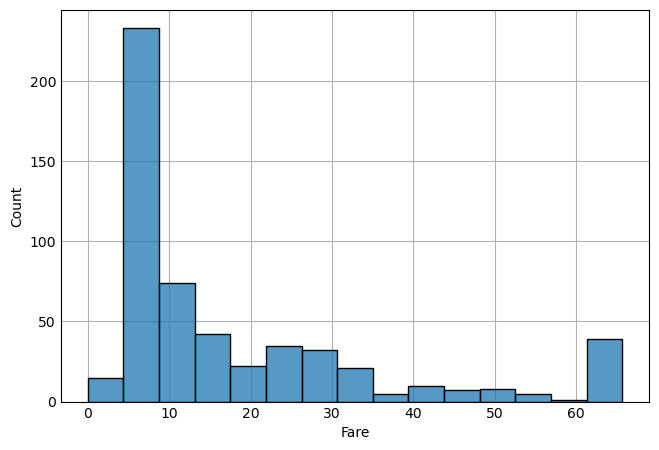

In [487]:
plt.subplots(figsize=(6, 4))

sns.histplot(data=only_survived,x='Fare')

#it seems that passengers who paid fare between 5 to 10 are the more survivals that who paid higher ticket

**9.Is there a relationship between having a recorded cabin number and the chance of survival?**

In [499]:
#can't understand the question

**10.What were the ages of the oldest and youngest survivors?**

In [533]:
# 1.Creat column for Age Group where people who are from 0- 19 are young and above 19 are adults

only_survived['AgeGroup'] = np.where(only_survived['Age'] <= 19, 'Young', 'Adult')

#2. Defines the edges of intervals for ages
bins = [0, 19, only_survived['Age'].max()] 
labels = ['Young', 'Adult']

# 3.create AgeGroup based on intervals
only_survived['AgeGroup'] = pd.cut(only_survived['Age'], bins=bins, labels=labels, right=True) 
 

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2825200547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_survived['AgeGroup'] = np.where(only_survived['Age'] <= 19, 'Young', 'Adult')
/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2825200547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_survived['AgeGroup'] = pd.cut(only_survived['Age'], bins=bins, labels=labels, right=True)


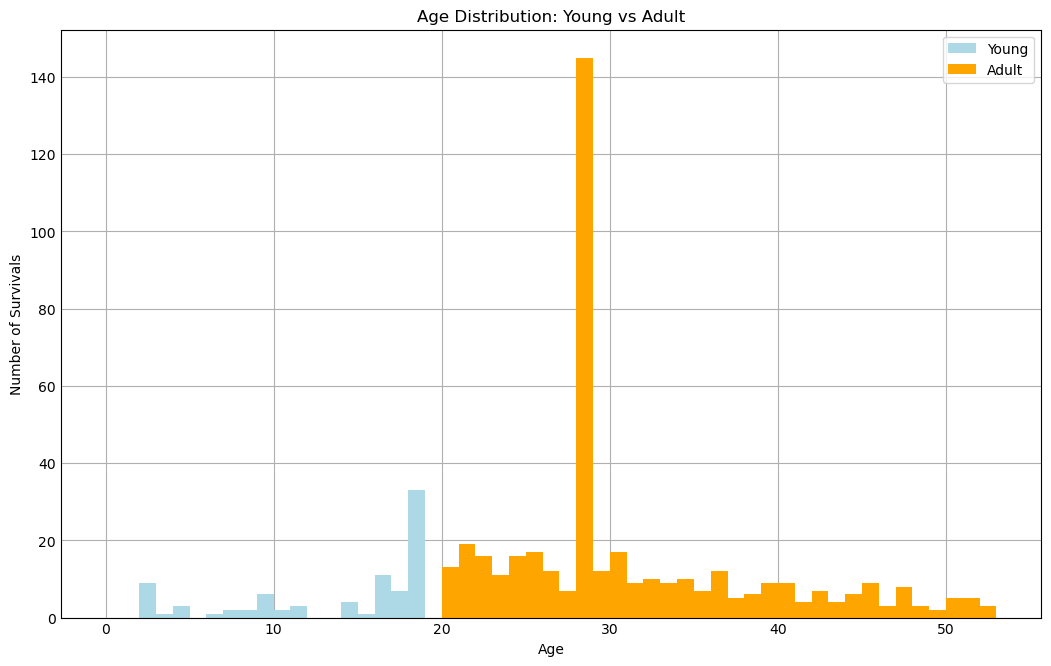

In [549]:
plt.figure(figsize=(10,6))
plt.hist(only_survived[only_survived['AgeGroup'] == 'Young']['Age'], bins=range(0,20), color='lightblue', label='Young')
plt.hist(only_survived[only_survived['AgeGroup'] == 'Adult']['Age'],bins=range(20,int(only_survived['Age'].max())), color='orange', label='Adult')
plt.xlabel('Age')
plt.ylabel('Number of Survivals')
plt.title('Age Distribution: Young vs Adult')
plt.legend()
plt.show()

**11.What was the difference in survival rates between third-class passengers and passengers from first and second class combined?**

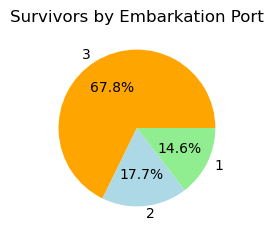

In [554]:
survivors_by_class = only_survived['Pclass'].value_counts()

plt.figure(figsize=(2,2))

survivors_by_class.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightblue', 'lightgreen'])

plt.title('Survivors by Embarkation Port')
plt.ylabel('')  # Hide the y-label
plt.show()

**12.Which passenger class had the highest average age? What might this suggest about the type of travelers in that class?**

In [608]:
k=df.groupby(['Pclass'])['Age'].mean()
y= pd.DataFrame(k).T
y

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2444089055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  k=df.groupby(['Pclass'])['Age'].mean()


Pclass,1,2,3
Age,35.806075,29.543478,25.830957


/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2889585617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k.index, y=k.values, palette='viridis')


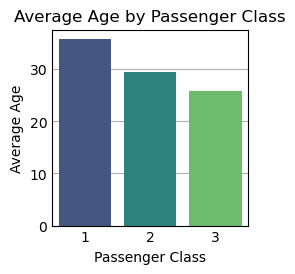

In [582]:
plt.figure(figsize=(2,2))
sns.barplot(x=k.index, y=k.values, palette='viridis')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.title('Average Age by Passenger Class')
plt.show()

**13.If you split passengers into three groups based on fare (Low, Medium, High), which group had the highest survival rate?**

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/2800434514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_survived["Fare_Group"] = pd.qcut(only_survived["Fare"], q=3, labels=["Low", "Medium", "High"])


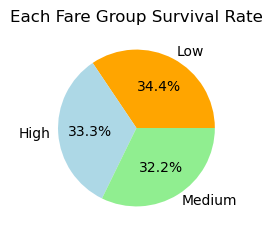

In [607]:
# 	•	We want to split into categories (Low, Medium, High)
#	•	Use pd.qcut() → splits data into equal-sized parts (quantiles)
# creat a new column using pd.qcut()

only_survived["Fare_Group"] = pd.qcut(only_survived["Fare"], q=3, labels=["Low", "Medium", "High"])

# Calculate survival rates by fare group
y=only_survived['Fare_Group']

survivors_by_class = y.value_counts()

plt.figure(figsize=(2,2))

survivors_by_class.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightblue', 'lightgreen'])

plt.title('Each Fare Group Survival Rate')
plt.ylabel('')  # Hide the y-label
plt.show()


**14.Who were the top 10 passengers who paid the highest fares, and did they survive?**

In [642]:
Top_pass = df.sort_values(by="Fare", ascending=False).head(10)[["PassengerId","Name", "Fare", "Survived"]]
Top_pass

#They all survived

,PassengerId,Name,Fare,Survived
445,446,"Dodge, Master. Washington",65.6563,1
291,292,"Bishop, Mrs. Dickinson H (Helen Walton)",65.6563,1
299,300,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",65.6563,1
305,306,"Allison, Master. Hudson Trevor",65.6563,1
306,307,"Fleming, Miss. Margaret",65.6563,1
307,308,"Penasco y Castellana, Mrs. Victor de Satode (M...",65.6563,1
310,311,"Hays, Miss. Margaret Bechstein",65.6563,1
311,312,"Ryerson, Miss. Emily Borie",65.6563,1
318,319,"Wick, Miss. Mary Natalie",65.6563,1
319,320,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",65.6563,1


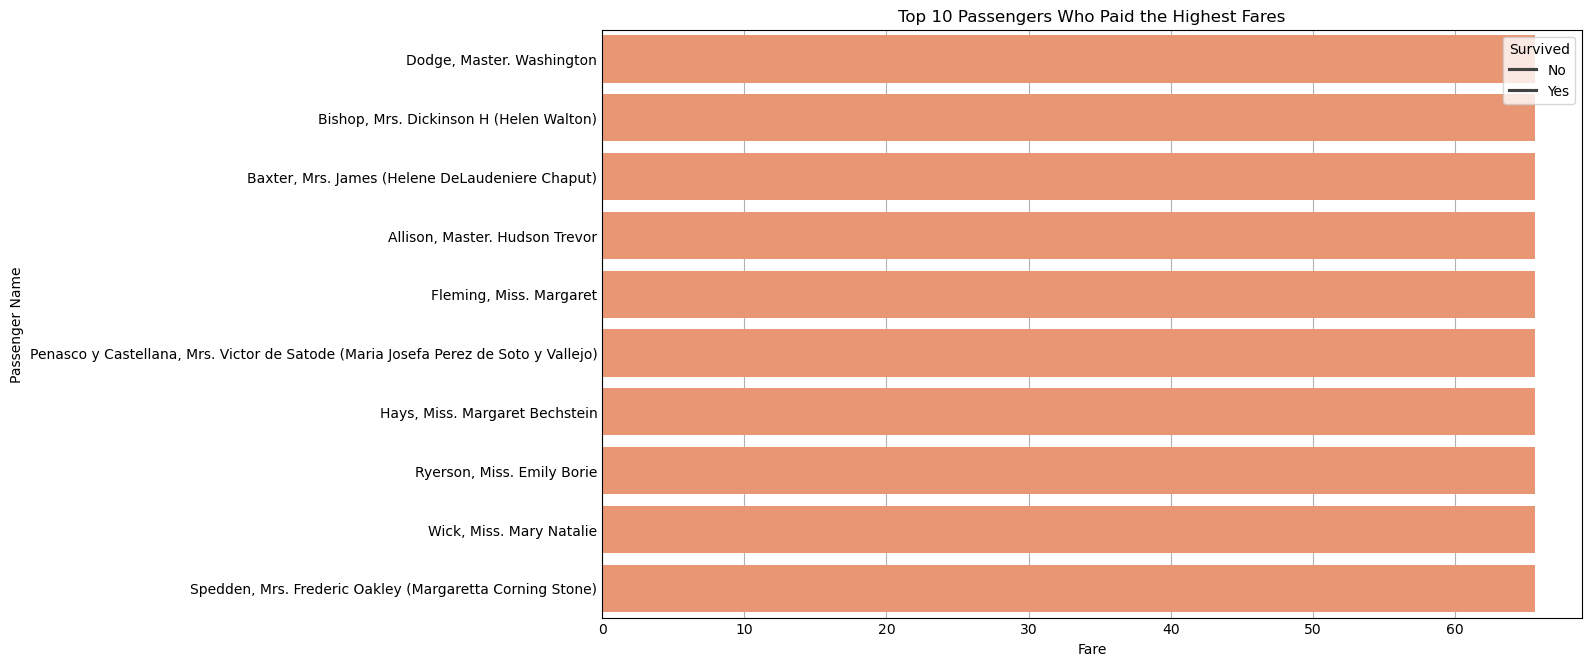

In [644]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Top_pass,
    x="Fare",
    y="Name",
    hue="Survived",  # Color bars by survival status
    palette="Set2"
)

# Add labels and title
plt.xlabel("Fare")
plt.ylabel("Passenger Name")
plt.title("Top 10 Passengers Who Paid the Highest Fares")
plt.legend(title="Survived", labels=["No", "Yes"])

plt.show()

**14.If you create a “Group Size” column (SibSp + Parch + 1), do larger groups have better or worse survival chances?**

/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/3983993999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg=df["group_size"]=df["SibSp"].astype(int)+df["Parch"].astype(int)+1


Text(0, 0.5, 'Number of Survivals')

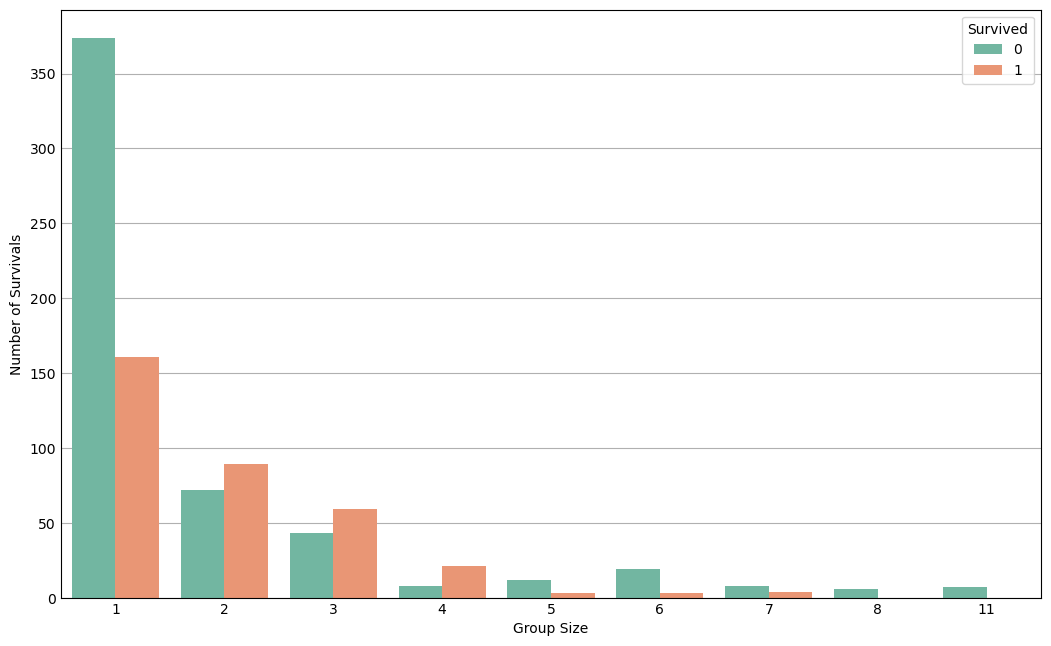

In [685]:
dg=df["group_size"]=df["SibSp"].astype(int)+df["Parch"].astype(int)+1

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x=dg,
    hue="Survived",  # Color bars by survival status
    palette="Set2"
)
plt.xlabel("Group Size")
plt.ylabel("Number of Survivals")

# Larger groups has somehow the worse survival chances

**15.Among female passengers, which class had the highest survival rate? Does the same trend hold for male passengers?**

In [677]:
p_s= only_survived.groupby(['Pclass'])['Sex'].value_counts().reset_index(name='Count')

p_s


/var/folders/12/gk_y01d977l0jb0_5w_bgbdc0000gn/T/ipykernel_35012/1296100871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p_s= only_survived.groupby(['Pclass'])['Sex'].value_counts().reset_index(name='Count')


,Pclass,Sex,Count
0,1,male,77
1,1,female,3
2,2,male,91
3,2,female,6
4,3,male,300
5,3,female,72


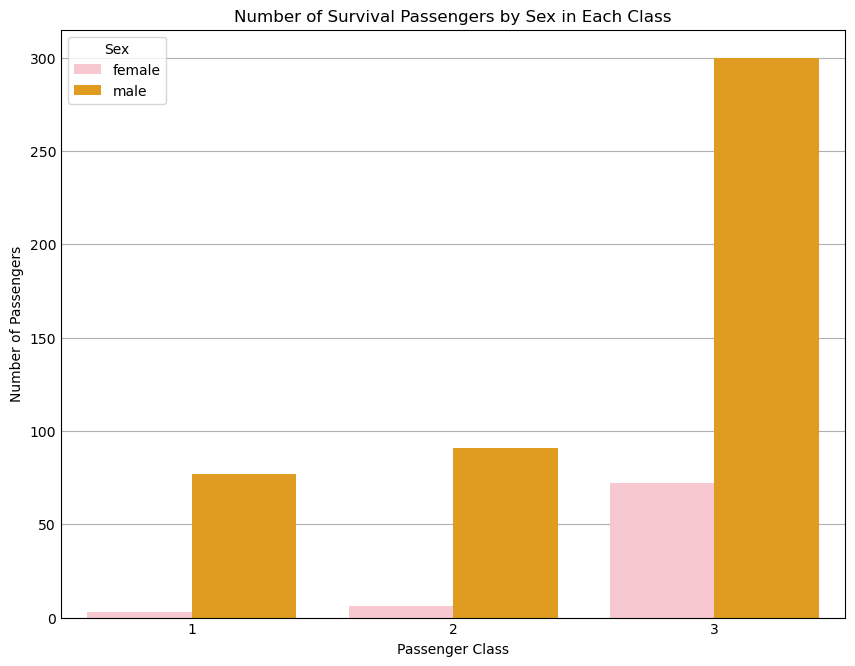

In [679]:
plt.figure(figsize=(8,6))
sns.barplot(data=p_s, x='Pclass', y='Count', hue='Sex', palette=['pink', 'orange'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Survival Passengers by Sex in Each Class')
plt.show()

In [680]:
#Class 3 has the highest survival rate for males and females